<a href="https://colab.research.google.com/github/Gideon18-web/Pandas-for-EDA-Explanatory-Data-Analysis-/blob/main/Kenya_Literacy_Trends_and_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt #Visualisations
import seaborn as sns #Heatmap

In [ ]:
#Count Number of Literate people (M/W)
df = pd.read_csv("literacy_levels_cleaned.csv")
gender_lit_type_count = df.value_counts("Indicator")

#Counts per year
#2003
yr_2003 = df[df['SurveyYear'] == 2003]
yr_2003_lit_count = yr_2003.value_counts("Indicator")
yr_2003_lit_count

#2008
yr_2008 = df[df['SurveyYear'] == 2008]
yr_2008_lit_count = yr_2008.value_counts("Indicator")
yr_2008_lit_count

#2014
yr_2014 = df[df['SurveyYear'] == 2014]
yr_2014_lit_count = yr_2014.value_counts("Indicator")
yr_2014_lit_count

#2015
yr_2015 = df[df['SurveyYear'] == 2015]
yr_2015_lit_count = yr_2015.value_counts("Indicator")
yr_2015_lit_count

#2020
yr_2020 = df[df['SurveyYear'] == 2020]
yr_2020_lit_count = yr_2020.value_counts("Indicator")
yr_2020_lit_count


#2022
yr_2022 = df[df['SurveyYear'] == 2022]
yr_2022_lit_count = yr_2022.value_counts("Indicator")
yr_2022_lit_count


,count
Indicator,
Men for whom no card with required language was available,47
Men who are blind/visually impaired,47
Men who are literate,47
Men who can read a whole sentence,47
Men who can read part of a sentence,47
Men who cannot read at all,47
Men with secondary or higher education,47
Men's literacy: Total,47
Women for whom no card with required language was available,47


In [ ]:
#Output of Men and Women who took lit tests in each year
print(f"Men and Women who took a literature Test in 2003: \n{yr_2003_lit_count} \n")
print(f"Men and Women who took a literature Test in 2008: \n{yr_2008_lit_count} \n")
print(f"Men and Women who took a literature Test in 2014: \n{yr_2014_lit_count} \n")
print(f"Men and Women who took a literature Test in 2015: \n{yr_2015_lit_count} \n")
print(f"Men and Women who took a literature Test in 2020: \n{yr_2020_lit_count} \n")
print(f"Men and Women who took a literature Test in 2022: \n{yr_2022_lit_count} \n")

#2015 and 2020 - Only women took the literature tests (*Peak in 2015)

# % Share of Each Literacy Category
gender_lit_type_pct = (gender_lit_type_count / gender_lit_type_count.sum()) * 100
print(gender_lit_type_pct)

# each survey collects the same number of entries per category.


Men and Women who took a literature Test in 2003: 
Indicator
Men for whom no card with required language was available      8
Men who are literate                                           8
Men who can read a whole sentence                              8
Men who can read part of a sentence                            8
Men who cannot read at all                                     8
Men with missing information on literacy                       8
Men with secondary or higher education                         8
Men's literacy: Total                                          8
Women for whom no card with required language was available    8
Women who are literate                                         8
Women who can read a whole sentence                            8
Women who can read part of a sentence                          8
Women who cannot read at all                                   8
Women with missing information on literacy                     8
Women with secondary or highe

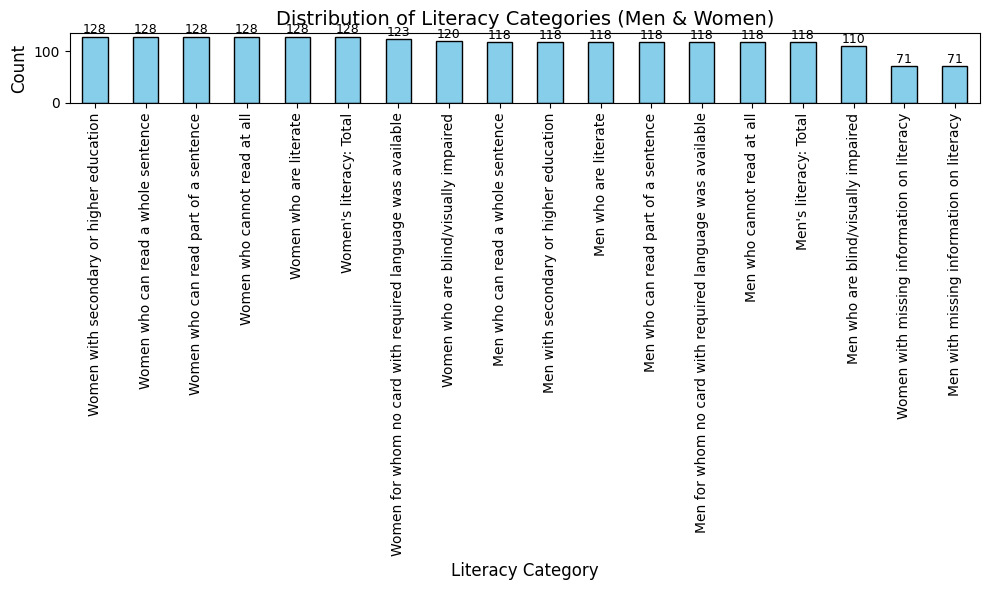

In [ ]:
# Plot
plt.figure(figsize=(10, 6))
bars = gender_lit_type_count.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Distribution of Literacy Categories (Men & Women)", fontsize=14)
plt.ylabel("Count", fontsize=12)
plt.xlabel("Literacy Category", fontsize=12)
plt.xticks(rotation=90)

# Add value labels
for i, value in enumerate(gender_lit_type_count):
    plt.text(i, value + 0.5, str(value), ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()



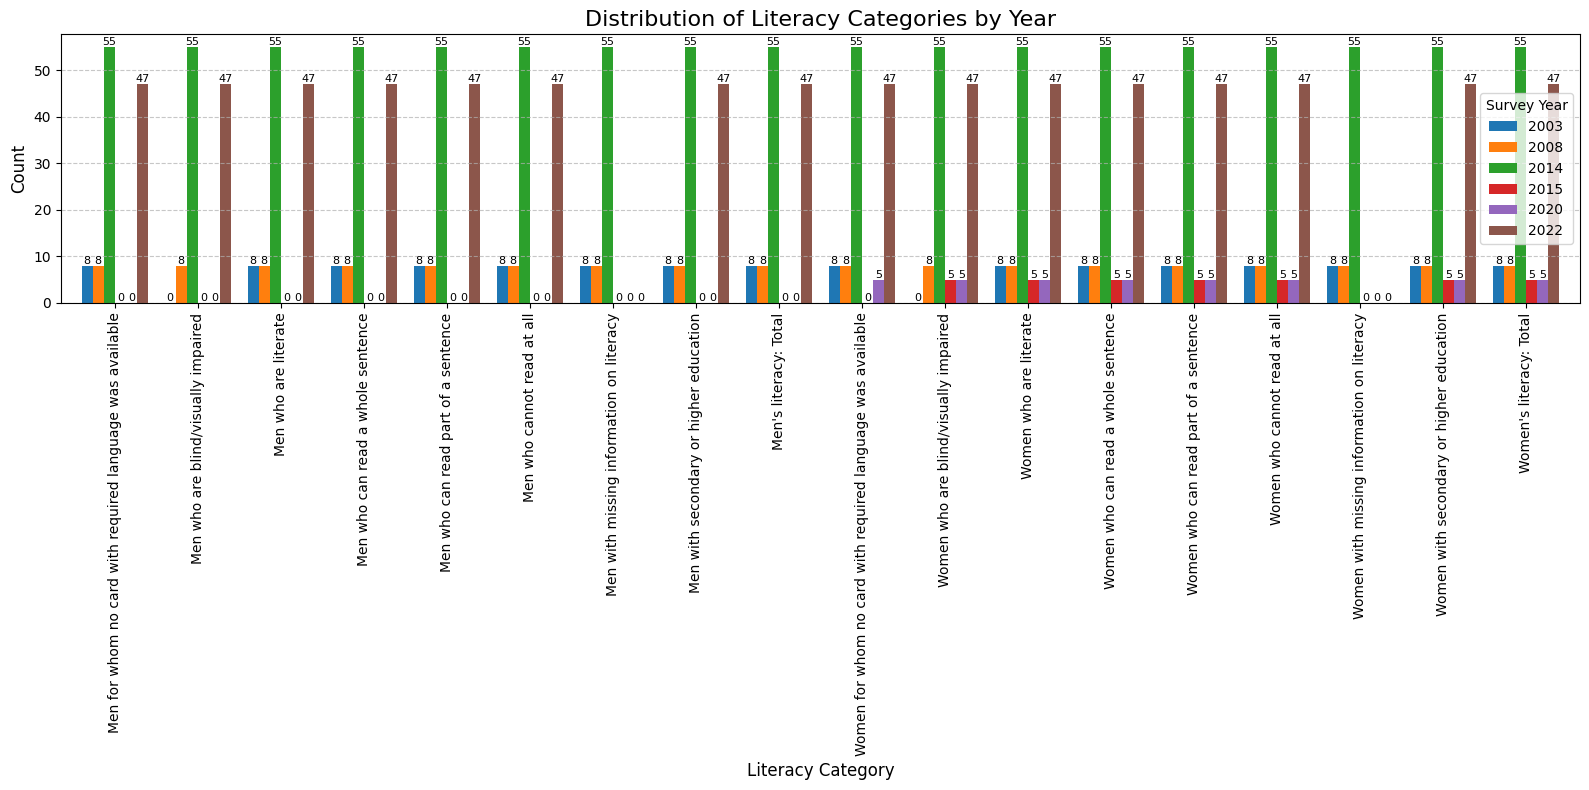

In [ ]:
# Count values per literacy category for each year
lit_counts_per_year = df.groupby(["SurveyYear", "Indicator"]).size().unstack(fill_value=0)

# Plot grouped bar chart
ax = lit_counts_per_year.T.plot(kind="bar", figsize=(16, 8), width=0.8)

plt.title("Distribution of Literacy Categories by Year", fontsize=16)
plt.xlabel("Literacy Category", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=90)
plt.legend(title="Survey Year")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Add labels on each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=8)

plt.tight_layout()
plt.show()

/tmp/ipython-input-179643126.py:18: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  ax.text(x, y + 0.3, f"{y:.1f}", ha='center', fontsize=9)
/usr/local/lib/python3.11/dist-packages/matplotlib/text.py:906: UserWarning: Warning: converting a masked element to nan.
  y = float(self.convert_yunits(self._y))


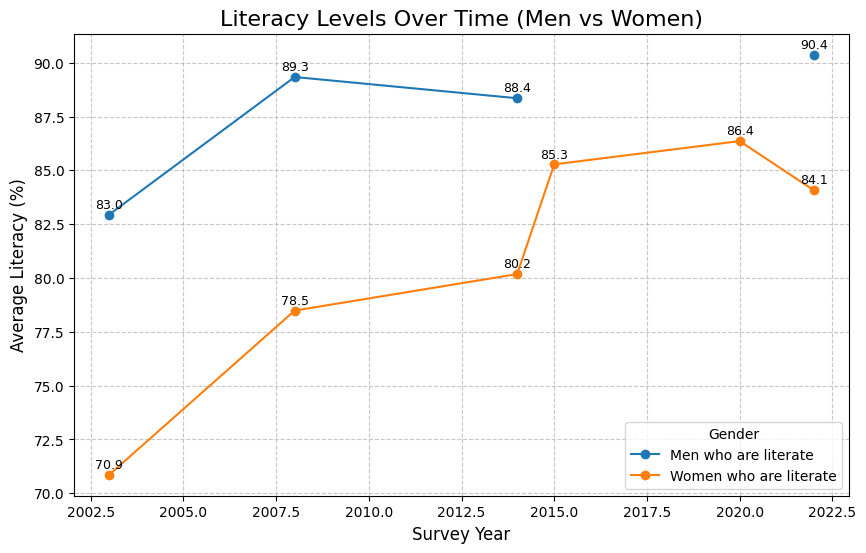

In [ ]:
# Filter for only 'Men who are literate' and 'Women who are literate'
lit_df = df[df["Indicator"].isin(["Men who are literate", "Women who are literate"])]

# Group by year and gender
avg_lit = lit_df.groupby(["SurveyYear", "Indicator"])["Value"].mean().unstack()

# Plot trend
ax = avg_lit.plot(kind="line", marker="o", figsize=(10, 6))
plt.title("Literacy Levels Over Time (Men vs Women)", fontsize=16)
plt.ylabel("Average Literacy (%)", fontsize=12)
plt.xlabel("Survey Year", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(title="Gender")

# Add labels on each point
for line in ax.lines:
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        ax.text(x, y + 0.3, f"{y:.1f}", ha='center', fontsize=9)

plt.show()


In [ ]:
#Men Only for all survey year
men_df = df[df["Indicator"].str.contains(r"\bMen\b", case=False, regex=True)]
#Women Only for every survey year
women_df = df[df["Indicator"].str.contains(r"\bWomen\b", case=False, regex=True)]

#Group (W) by location
location_women = women_df.groupby('Location')['Indicator'].value_counts()
#Group (M) by location
location_men = men_df.groupby('Location')['Indicator'].value_counts()
print(location_men.to_string())
location_women


Location         Indicator                                                
Baringo          Men for whom no card with required language was available    2
                 Men who are blind/visually impaired                          2
                 Men who are literate                                         2
                 Men who can read a whole sentence                            2
                 Men who can read part of a sentence                          2
                 Men who cannot read at all                                   2
                 Men with secondary or higher education                       2
                 Men's literacy: Total                                        2
                 Men with missing information on literacy                     1
Bomet            Men for whom no card with required language was available    2
                 Men who are blind/visually impaired                          2
                 Men who are literate        

Location  Indicator                                                  
Baringo   Women for whom no card with required language was available    2
          Women who are blind/visually impaired                          2
          Women who are literate                                         2
          Women who can read a whole sentence                            2
          Women who can read part of a sentence                          2
                                                                        ..
Western   Women who cannot read at all                                   3
          Women with missing information on literacy                     3
          Women with secondary or higher education                       3
          Women's literacy: Total                                        3
          Women who are blind/visually impaired                          2
Name: count, Length: 526, dtype: int64

In [ ]:
#Literacy Level by Location
df.groupby("Location")["Value"].mean().sort_values(ascending=False)

,Value
Location,
Low risk,39.233333
Highland epidemic,38.666667
Lake endemic,38.440000
Coast endemic,37.806667
"Semi-arid, seasonal",36.406667
Machakos,35.082353
Nyamira,35.070588
Kiambu,34.955882
Kisumu,34.932353


In [ ]:
#Average Literacy Levels per survey year
avg_per_year = df.groupby("SurveyYear")["Value"].mean()
print("\nAverage literacy per year:\n", avg_per_year)


Average literacy per year:
 SurveyYear
2003    34.610156
2008    31.546528
2014    31.585859
2015    40.757143
2020    35.795000
2022    35.902660
Name: Value, dtype: float64


In [ ]:
# # # Top 3 regions
# top_3 = df.groupby(["Location","SurveyYear"])["Value"].mean().sort_values(ascending=False).head(3)
# print("Top 3 regions:\n", top_3)

# # Bottom 3 regions
# bottom_3 = df.groupby(["Location","SurveyYear"])["Value"].mean().sort_values().head(3)
# print("\nBottom 3 regions:\n", bottom_3)

Top 3 regions:
 Location           SurveyYear
Low risk           2015          42.000000
Highland epidemic  2015          41.357143
Lake endemic       2015          40.885714
Name: Value, dtype: float64

Bottom 3 regions:
 Location       SurveyYear
Turkana        2014          26.522222
North Eastern  2008          26.933333
Wajir          2014          26.961111
Name: Value, dtype: float64


In [ ]:
#Top 3 regions per survey year
top_3_per_year = (
    df.groupby("SurveyYear")
      .apply(lambda x: x.groupby("Location")["Value"].mean()
                        .nlargest(3))
)

print("Top 3 per survey year : ")
print(top_3_per_year)

# Alt Code
avg_per_year = df.groupby(["SurveyYear", "Location"])["Value"].mean().reset_index()
top_3_per_year = avg_per_year.sort_values(["SurveyYear", "Value"], ascending=[True, False])
top_3_per_year = top_3_per_year.groupby("SurveyYear").head(3)

# print("Top 3 per survey year : ")
# print(top_3_per_year)

#Bottom 3 regions per survey year
# Average literacy per location per year
avg_per_year = df.groupby(["SurveyYear", "Location"])["Value"].mean().reset_index()

# Bottom 3 per year
bottom_3_per_year_lambda = avg_per_year.groupby("SurveyYear").apply(
    lambda g: g.nsmallest(3, "Value")
).reset_index(drop=True)

print("Bottom 3 per survey year: ")
print(bottom_3_per_year_lambda)

#Alt Code
# Average literacy per location per year
avg_per_year = df.groupby(["SurveyYear", "Location"])["Value"].mean().reset_index()

# Sort by year ascending & value ascending
sorted_df = avg_per_year.sort_values(["SurveyYear", "Value"], ascending=[True, True])

# Pick the first 3 of each year
bottom_3_per_year_no_lambda = sorted_df.groupby("SurveyYear").head(3)

# print("Bottom 3 per survey year : ")
# print(bottom_3_per_year_no_lambda)

Top 3 per survey year : 
SurveyYear  Location         
2003        Central              36.631250
            Nairobi              36.625000
            Eastern              35.918750
2008        Nairobi              32.977778
            Central              32.705556
            Eastern              32.350000
2014        Nyamira              33.211111
            Nairobi              33.066667
            Kiambu               33.000000
2015        Low risk             42.000000
            Highland epidemic    41.357143
            Lake endemic         40.885714
2020        Low risk             36.812500
            Highland epidemic    36.312500
            Lake endemic         36.300000
2022        Machakos             37.425000
            Embu                 37.368750
            Kisumu               37.337500
Name: Value, dtype: float64
Bottom 3 per survey year: 
    SurveyYear             Location      Value
0         2003        North Eastern  27.343750
1         2003        

/tmp/ipython-input-743425793.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.groupby("Location")["Value"].mean()
/tmp/ipython-input-743425793.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  bottom_3_per_year_lambda = avg_per_year.groupby("SurveyYear").apply(


In [ ]:
#Gender Literacy Gap
df['Gender'] = df['Indicator'].str.extract(r'^(Men|Women)')
gender_avg = df.groupby(['SurveyYear', 'Gender'])['Value'].mean()
print(gender_avg)


SurveyYear  Gender
2003        Men       35.367188
            Women     33.853125
2008        Men       32.147222
            Women     30.945833
2014        Men       32.039798
            Women     31.131919
2015        Women     40.757143
2020        Women     35.795000
2022        Men       36.297074
            Women     35.508245
Name: Value, dtype: float64


In [ ]:
indicator_avg = df.groupby(['SurveyYear', 'Indicator'])['Value'].mean()
print(indicator_avg.to_string())


SurveyYear  Indicator                                                  
2003        Men for whom no card with required language was available        0.025000
            Men who are literate                                            82.950000
            Men who can read a whole sentence                               42.950000
            Men who can read part of a sentence                              4.825000
            Men who cannot read at all                                      16.962500
            Men with missing information on literacy                         0.062500
            Men with secondary or higher education                          35.162500
            Men's literacy: Total                                          100.000000
            Women for whom no card with required language was available      0.012500
            Women who are literate                                          70.862500
            Women who can read a whole sentence                     

In [ ]:
#Location vs Value
# One-hot encode locations
df_encoded = pd.get_dummies(df["Location"])

# Add literacy values
df_encoded["Value"] = df["Value"]

# Correlation for each location
correlation_matrix = df_encoded.corr()["Value"].sort_values(ascending=False)
print(correlation_matrix)


Value                  1.000000
Low risk               0.012723
Highland epidemic      0.011453
Lake endemic           0.010945
Coast endemic          0.009526
Semi-arid, seasonal    0.006388
Machakos               0.005172
Nyamira                0.005132
Nairobi                0.005056
Kiambu                 0.004743
Kisumu                 0.004664
Nyeri                  0.004634
Uasin Gishu            0.004574
Elgeyo Marakwet        0.004524
Embu                   0.004434
Nandi                  0.004275
Kericho                0.004255
Makueni                0.004225
Kisii                  0.004165
Nakuru                 0.004055
Nyandarua              0.004045
Taita Taveta           0.003986
Vihiga                 0.003936
Kirinyaga              0.003886
Murang'a               0.003826
Mombasa                0.003667
Bomet                  0.003647
Kakamega               0.003228
Homa Bay               0.003068
Kitui                  0.002949
Siaya                  0.002510
Trans-Nz

In [ ]:
#Literacy vs Time ( Survey Year)

yearly_avg = df.groupby("SurveyYear")["Value"].mean().reset_index()

# Calculate correlation between year and literacy value
year_corr = yearly_avg["SurveyYear"].corr(yearly_avg["Value"])
print("Correlation between Year and Literacy Value:", year_corr)

print(yearly_avg)


Correlation between Year and Literacy Value: 0.3495619344621617
   SurveyYear      Value
0        2003  34.610156
1        2008  31.546528
2        2014  31.585859
3        2015  40.757143
4        2020  35.795000
5        2022  35.902660


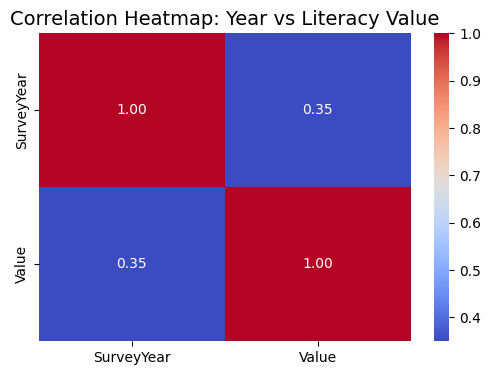

In [ ]:
# Create a correlation matrix
corr_matrix = yearly_avg.corr()

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Heatmap: Year vs Literacy Value", fontsize=14)
plt.show()


In [ ]:
#Literacy vs Gender
# Create gender column from 'Indicator'
df['Gender'] = df['Indicator'].apply(lambda x: 'Men' if x.startswith('Men') else 'Women')

# Average literacy by gender per survey year
gender_avg = df.groupby(["SurveyYear", "Gender"])["Value"].mean().unstack()

print("\nAverage Literacy by Gender per Year:\n", gender_avg)

# Correlation between men and women literacy across years
gender_corr = gender_avg["Men"].corr(gender_avg["Women"])
print("\nCorrelation between Men's and Women's literacy levels:", gender_corr)



Average Literacy by Gender per Year:
 Gender            Men      Women
SurveyYear                      
2003        35.367188  33.853125
2008        32.147222  30.945833
2014        32.039798  31.131919
2015              NaN  40.757143
2020              NaN  35.795000
2022        36.297074  35.508245

Correlation between Men's and Women's literacy levels: 0.989179737339017


In [ ]:
df.head()

,Location,DataId,Indicator,Value,SurveyYear,SurveyId,IndicatorId,IndicatorOrder,IndicatorType,CharacteristicId,CharacteristicOrder,SDRID,RegionId,SurveyType,DenominatorWeighted,DenominatorUnweighted,LevelRank
0,Coast,4667037,Women with secondary or higher education,19.9,2003,KE2003DHS,ED_LITR_W_SCH,231233010,I,416003,1416010,EDLITRWSCH,KEDHS2003416003,DHS,667,938,1
1,North Eastern,5385284,Women with secondary or higher education,0.8,2003,KE2003DHS,ED_LITR_W_SCH,231233010,I,416008,1416020,EDLITRWSCH,KEDHS2003416008,DHS,168,437,1
2,Eastern,7236894,Women with secondary or higher education,22.2,2003,KE2003DHS,ED_LITR_W_SCH,231233010,I,416004,1416030,EDLITRWSCH,KEDHS2003416004,DHS,1325,993,1
3,Central,6493890,Women with secondary or higher education,41.6,2003,KE2003DHS,ED_LITR_W_SCH,231233010,I,416002,1416040,EDLITRWSCH,KEDHS2003416002,DHS,1181,1314,1
4,Rift Valley,1451582,Women with secondary or higher education,25.0,2003,KE2003DHS,ED_LITR_W_SCH,231233010,I,416006,1416050,EDLITRWSCH,KEDHS2003416006,DHS,1872,1328,1


In [ ]:
df.corr()

NameError: name 'df' is not defined